In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class DTW:
    """
    Dynamic Time Warping (DTW) model for comparing time-series data.
    
    Largely replicates the algorithm(s) detailed in 
    Dynamic Time Warping Algorithm Review,
    https://seninp.github.io/assets/pubs/senin_dtw_litreview_2008.pdf
    """
    
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.N = len(X)
        self.M = len(Y)
        
        
    def build_global_cost_matrix(self):
        """
        Builds an NxM cost matrix, specified by Algorithm 2.1. 
        """
        
        self.cost_matrix = np.zeros((self.N, self.M))
        
        #initialise first row
        row_acc = 0
        x_1 = self.X[0]
        for k in range(self.M):
            cost_val_row = abs(x_1 - self.Y[k])
            self.cost_matrix[0, k] = row_acc + cost_val_row
            row_acc += cost_val_row
        
        #initialise first col
        col_acc = 0
        y_1 = self.Y[0]
        for j in range(self.N):
            cost_val_col = abs(y_1 - self.X[j])
            self.cost_matrix[j, 0] = col_acc + cost_val_col
            col_acc += cost_val_col        
            
        # populate all other entries
        for i in range(1, self.N):
            for z in range(1, self.M):
                cost_candidates = [self.cost_matrix[i-1, z-1], self.cost_matrix[i-1, z],\
                                  self.cost_matrix[i, z-1]]
                self.cost_matrix[i, z] = min(cost_candidates) + abs(self.X[i] - self.Y[z])
                
        return self.cost_matrix
    
    
    def optimal_warping_path(self):
        """
        Retrieves the optimal warping path, specified by Algorithm 2.2.
        This algorithm makes use of dynamic programming to achieve the desired result.
        """
        
        self.path = []
        i = self.N-1
        j = self.M-1
        
        while (i >= 0) and (j >= 0):
            if i == 0:
                j-= 1
            elif j == 0:
                i-= 1
            else:
                # find the minimum amongst candidate values
                candidate_values = [self.cost_matrix[i-1, j], self.cost_matrix[i, j-1],\
                                   self.cost_matrix[i-1, j-1]]
                candidate_coordinates = [(i-1, j), (i, j-1), (i-1, j-1)]        
                min_coordinates = candidate_coordinates[np.argmin(candidate_values)]
                # update i, j values
                i = min_coordinates[0]
                j = min_coordinates[1]
                
                # append coordinates to path list
            self.path.append((i, j))
        
        # check for negative indices
        if (i < 0) or (j < 0):
            self.path.pop(len(self.path)-1)
        
        # append and prepend the starting and ending values respectively
        if self.path[len(self.path)-1] != (0,0):
            self.path.append((0,0))
        self.path.insert(0, (self.N-1, self.M-1))
                
        return self.path
    
    def main(self):
        """
        Main algorithm to call upon.
        """
        
        _ = self.build_global_cost_matrix()
        return self.optimal_warping_path()
                
            
        

### Experimentation and visualisation of implemented model

#### Example 1

In [3]:
data = np.arange(0,10,0.1)
X = np.sin(data)
Y = np.sin(data+10)

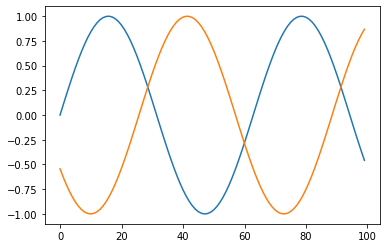

In [4]:
plt.plot(X)
plt.plot(Y)
plt.show()

In [5]:
test = DTW(X, Y)

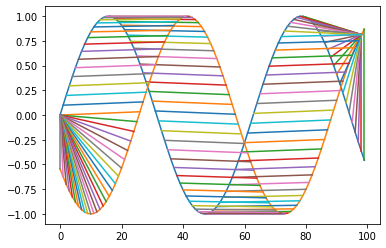

In [6]:
plt.plot(X)
plt.plot(Y)

for pair in test.main():
    X_ind, Y_ind = pair[0], pair[1]
    X_list_val = X[X_ind]
    Y_list_val = Y[Y_ind]
    
    x_coord = [X_ind, Y_ind]
    y_coord = [X_list_val, Y_list_val]
    plt.plot(x_coord, y_coord, '-')
    
    


#### Example 2

In [7]:
X = np.sin(data)
Y = np.sin(data)+3

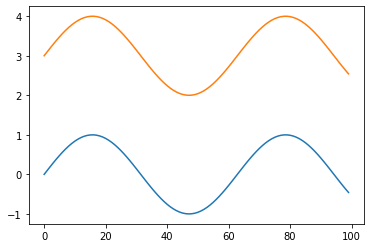

In [8]:
plt.plot(X)
plt.plot(Y)
plt.show()

In [9]:
test = DTW(X, Y)

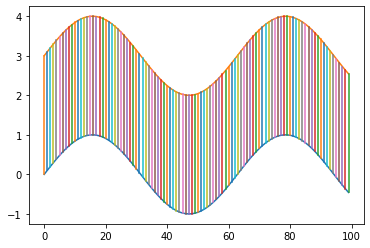

In [10]:
plt.plot(X)
plt.plot(Y)

for pair in test.main():
    X_ind, Y_ind = pair[0], pair[1]
    X_list_val = X[X_ind]
    Y_list_val = Y[Y_ind]
    
    x_coord = [X_ind, Y_ind]
    y_coord = [X_list_val, Y_list_val]
    plt.plot(x_coord, y_coord, '-')
    

#### Example 3

In [20]:
data2 = np.arange(0,15,0.1)
X = np.sin(data)
Y = np.sin(data2+1)

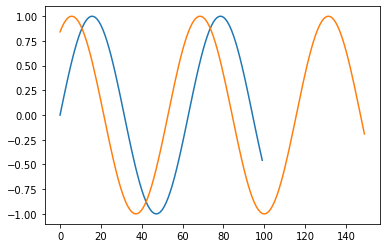

In [21]:
plt.plot(X)
plt.plot(Y)
plt.show()

In [22]:
test = DTW(X, Y)

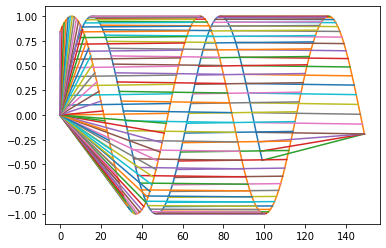

In [23]:
plt.plot(X)
plt.plot(Y)

for pair in test.main():
    X_ind, Y_ind = pair[0], pair[1]
    X_list_val = X[X_ind]
    Y_list_val = Y[Y_ind]
    
    x_coord = [X_ind, Y_ind]
    y_coord = [X_list_val, Y_list_val]
    plt.plot(x_coord, y_coord, '-')
    

In [ ]:
#########################